<a href="https://colab.research.google.com/github/mveiyo/mveiyo/blob/main/RESNET34.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import os
import numpy as np
from PIL import Image

# Define the Dataset Directory
dataset_dir = "/content/drive/MyDrive/dataset/"

# List to store image paths and corresponding labels
image_paths = []
labels = []

# Iterate through each class folder
for class_label in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_label)

    # Iterate through each image in the class folder
    for image_name in os.listdir(class_dir):
        # Read image path
        image_path = os.path.join(class_dir, image_name)

        # Append image path and label to lists
        image_paths.append(image_path)
        labels.append(class_label)  # Assuming class labels are folder names

# Convert labels to numeric format (e.g., using LabelEncoder)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(labels)

# Convert image paths to NumPy array (optional)
X = np.array(image_paths)

# Sanity check: print number of images and labels
print("Number of Images:", len(X))
print("Number of Labels:", len(y))

Number of Images: 71
Number of Labels: 71


In [15]:
from tensorflow.keras.preprocessing.image import img_to_array

# Define desired image dimensions
image_width, image_height = 224, 224

# Preprocess images
X_images_processed = []
for image_path in image_paths:
    image = Image.open(image_path)
    image = image.resize((image_width, image_height))  # Resize image
    image_array = img_to_array(image)  # Convert image to array
    image_array /= 255.0  # Normalize pixel values to [0, 1]
    X_images_processed.append(image_array)

X_processed = np.array(X_images_processed)

In [16]:
from sklearn.model_selection import train_test_split

# Split the dataset into training, validation, and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [17]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense

# Load ResNet-50 model pretrained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(image_height, image_width, 3))

# Add custom classification head
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(256, activation='relu')(x)
output = Dense(3, activation='softmax')(x)  # Assuming 3 classes for classification

# Create the model
model = Model(inputs=base_model.input, outputs=output)

# Freeze the base ResNet-50 layers
for layer in base_model.layers:
    layer.trainable = False

In [18]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
2/2 [==============================] - 14s 5s/step - loss: 1.2777 - accuracy: 0.3200 - val_loss: 1.2423 - val_accuracy: 0.6667
Epoch 2/50
2/2 [==============================] - 10s 3s/step - loss: 1.2613 - accuracy: 0.3000 - val_loss: 1.0806 - val_accuracy: 0.5000
Epoch 3/50
2/2 [==============================] - 10s 5s/step - loss: 1.1570 - accuracy: 0.2600 - val_loss: 0.8876 - val_accuracy: 0.3333
Epoch 4/50
2/2 [==============================] - 9s 4s/step - loss: 1.1503 - accuracy: 0.3800 - val_loss: 0.8412 - val_accuracy: 0.6667
Epoch 5/50
2/2 [==============================] - 11s 4s/step - loss: 1.0888 - accuracy: 0.4000 - val_loss: 1.1007 - val_accuracy: 0.5000
Epoch 6/50
2/2 [==============================] - 10s 5s/step - loss: 1.1037 - accuracy: 0.4400 - val_loss: 1.2103 - val_accuracy: 0.0000e+00
Epoch 7/50
2/2 [==============================] - 9s 4s/step - loss: 1.0925 - accuracy: 0.3600 - val_loss: 1.0197 - val_accuracy: 0.6667
Epoch 8/50
2/2 [================

In [19]:
# Evaluate the model on the testing set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

1/1 [==============================] - 2s 2s/step - loss: 0.8735 - accuracy: 0.6000
Test Loss: 0.873468816280365
Test Accuracy: 0.6000000238418579


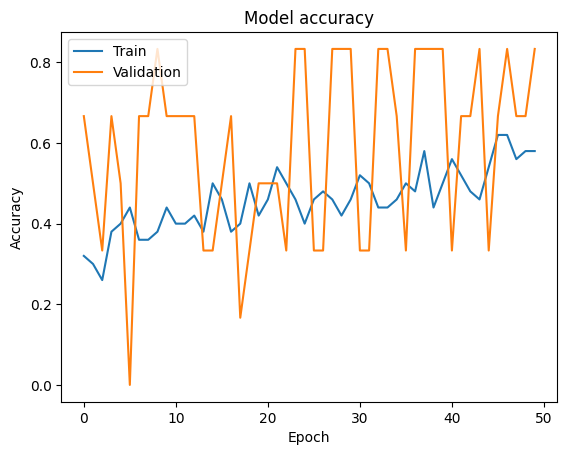

In [20]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

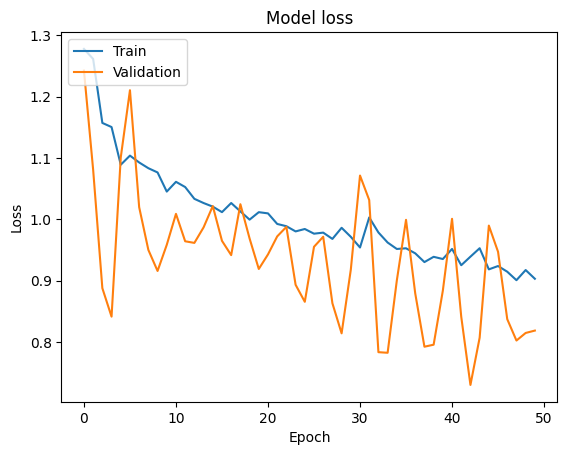

In [21]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

1/1 [==============================] - 2s 2s/step


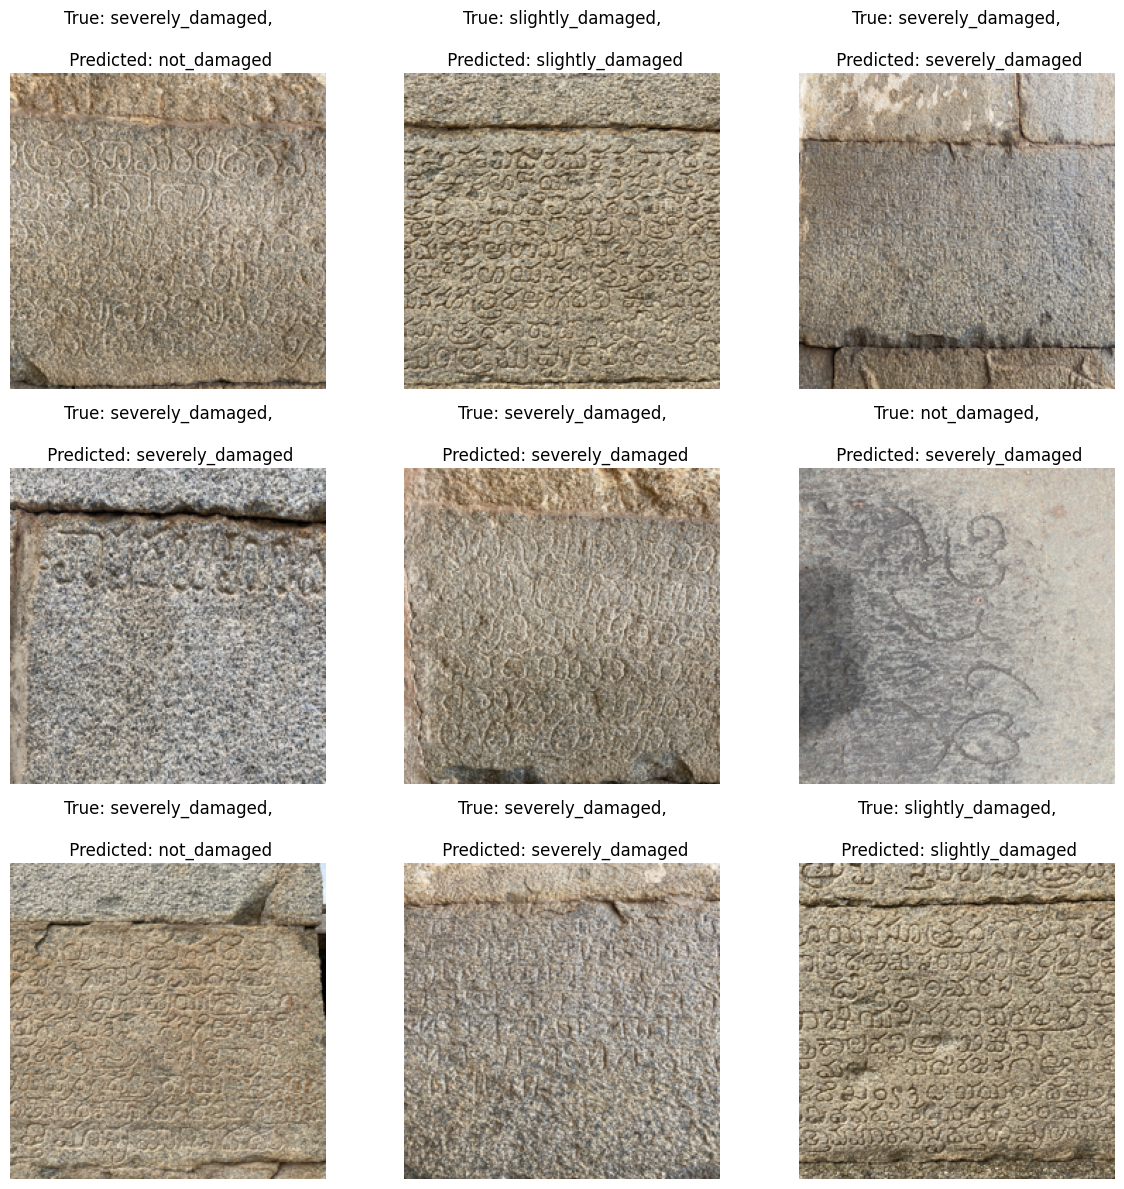

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Make predictions on the testing set
predictions = model.predict(X_test)

# Choose a few random indices to visualize
num_samples = 9
sample_indices = np.random.choice(len(X_test), num_samples, replace=False)

# Plot the images along with their predicted labels
plt.figure(figsize=(12, 12))
for i, idx in enumerate(sample_indices):
    image = X_test[idx]
    true_label = label_encoder.inverse_transform([y_test[idx]])[0]
    predicted_label = label_encoder.inverse_transform([np.argmax(predictions[idx])])[0]

    plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(f"True: {true_label},\n\n Predicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()